Project: Cleaning US_Census_Data

Author: Ayan Sarkar

Date: January 12, 2024

Description: Clean US Census Data

Import Relevant Libraries

In [493]:
#Import libraries
import pandas as pd
from glob import glob
import os
import matplotlib.pyplot as plt

Set Working Directory

In [495]:
#Set Working directory
%cd Projects/

[Errno 2] No such file or directory: 'Projects/'
/home/58ffa3bb-ef4b-42f3-a946-0a28f6b4b622/Projects


Read in all files

In [475]:
# Create an empty list to store DataFrames
dfs = []
file_names = glob('states*.csv')

#Loop all files and read in
for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

# Concatenate all DataFrames into one
us_census = pd.concat(dfs, ignore_index=True)
us_census = us_census.reset_index(drop=True)
us_census.drop('Unnamed: 0', axis=1, inplace=True) 

Reformat and Clean Relevant Data

In [478]:
# Remove extra characters and convert to numeric
us_census['Income'] = pd.to_numeric(us_census['Income'].replace('[\$,]', '', regex=True).str.strip(), errors='coerce')
us_census['Income'] = us_census['Income'].astype('int64')

#Calculate and seperate out population by male and female
us_census['GenderPop_M'] = us_census['GenderPop'].str.extract('(\d+)M')
us_census['TotalPop'] = pd.to_numeric(us_census['TotalPop'], errors='coerce').fillna(0).astype(int)
us_census['GenderPop_M'] = pd.to_numeric(us_census['GenderPop_M'], errors='coerce').fillna(0).astype(int)
us_census['GenderPop_F'] = us_census['TotalPop'] - us_census['GenderPop_M']
us_census.drop('GenderPop', axis=1, inplace=True)

#Convert obj types to int
demo = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for column in demo:
    us_census[column] = us_census[column].str.rstrip('%')
    us_census[column] = pd.to_numeric(us_census[column], errors='coerce')
    us_census[column] = us_census[column]/100

In [480]:
#Check to remove duplicates again and rest index
us_census = us_census[~us_census['State'].duplicated(keep='first')]
us_census = us_census.reset_index(drop=True)

Create Scatterplot showing Income Distribution of Female Populations

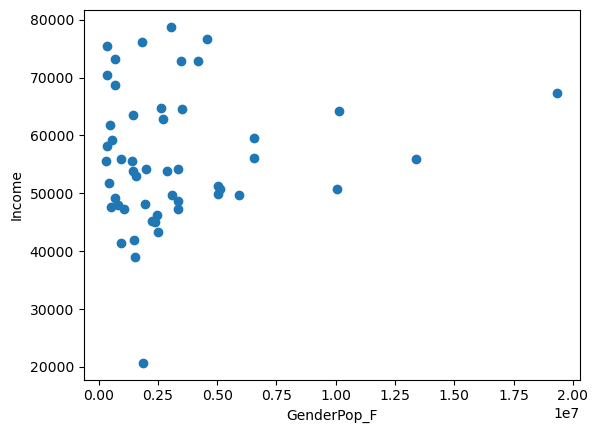

In [483]:
#Plot income and female population
plt.scatter(us_census['GenderPop_F'], us_census['Income'])
plt.xlabel('GenderPop_F')
plt.ylabel('Income')
plt.show()

Plot Income Distribution using Demographic Data in Histograms

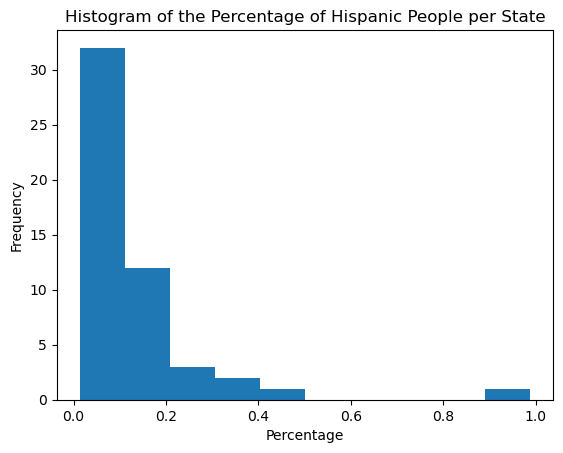

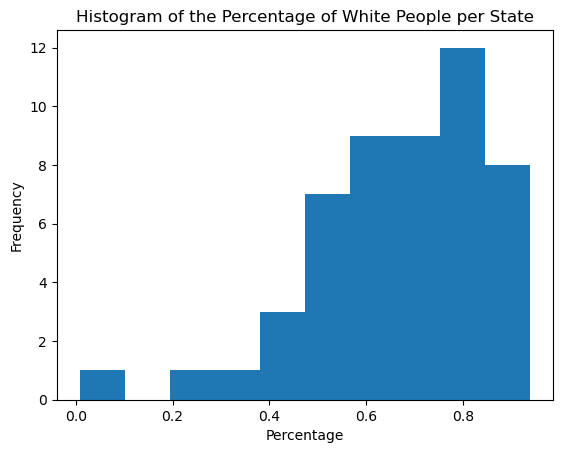

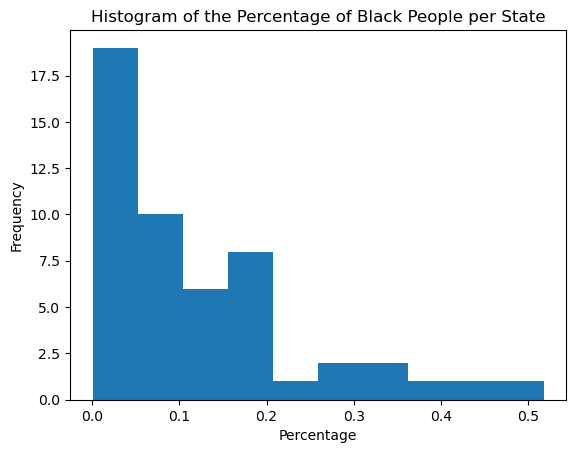

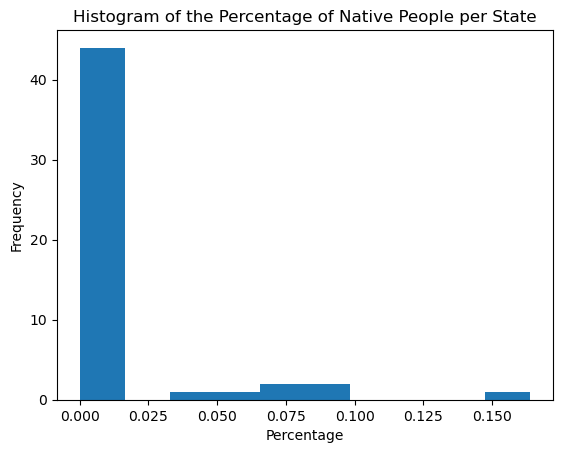

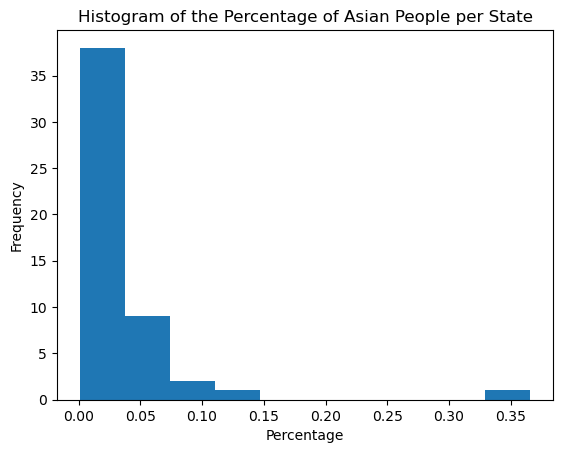

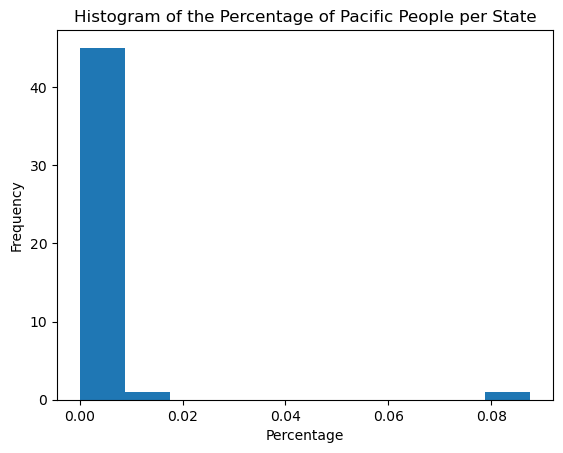

<Figure size 640x480 with 0 Axes>

In [508]:
#Generate histograms for all demographic categories
for column in demo:
    plt.hist(us_census[column])
    plt.title("Histogram of the Percentage of {} People per State".format(column))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()

Display Cleaned Final Data

In [499]:
display(us_census.head())

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop_M,GenderPop_F
0,Ohio,11575977,0.0367,0.7590,0.1621,0.0017,0.0162,0.0002,49655,5662893,5913084
1,Oklahoma,3849733,0.1008,0.6606,0.0831,0.0672,0.0180,0.0011,48100,1906944,1942789
2,Oregon,3939233,0.1144,0.7840,0.0173,0.0100,0.0359,0.0035,54271,1948453,1990780
3,Pennsylvania,12779559,0.0613,0.7738,0.1163,0.0012,0.0280,0.0002,56170,6245344,6534215
4,Puerto Rico,3583073,0.9889,0.0077,0.0009,0.0000,0.0008,0.0000,20720,1713860,1869213
